50 people => do a sampling to find out probability that at least 2 have same birthday

In [1]:
import torch
import pyro

def containFiftyBirthDaysDuplicates(days):
    bdaysample = pyro.ops.stats.resample(days, 50, replacement=True)
    bday_counts = torch.unique(bdaysample, return_counts=True)[1]
    return torch.where(bday_counts > 1, torch.ones(1), torch.zeros(1)).nonzero().size()[0] > 0

B=10000

days = torch.arange(1., 366.)

count = 0

for _ in range(B):
    if(containFiftyBirthDaysDuplicates(days)):
        count += 1     
        
print("Probability is: " + str(count/B ))


Probability is: 0.9709


Now:
* sample over n from 1 to 365
* exactly compute ehe same

In [2]:
def containNBirthDaysDuplicates(days, n):
    bdaysample = pyro.ops.stats.resample(days, n, replacement=True)
    bday_counts = torch.unique(bdaysample, return_counts=True)[1]
    return torch.where(bday_counts > 1, torch.ones(1), torch.zeros(1)).nonzero().size()[0] > 0

def computeDuplicateProb(days, n, batch):
    count = 0
    for _ in range(batch):
        if(containNBirthDaysDuplicates(days, n)):
            count += 1
    return count/batch

probs = []
for n in range(1,100):
    print(n)
    probs.append((n, computeDuplicateProb(days, n, 10000)))
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [5]:
def probOfNth(n):
    return (365 - n)/365

def probForNPeople(n):
    prob = 1.
    for i in range(n):
        prob = prob * probOfNth(n)
    return 1 - prob

calc_probs = []
for n in range(1,100):
    print(n)
    calc_probs.append((n, probForNPeople(n)))


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
[(1, 0.002739726027397249), (2, 0.010928879714768192), (3, 0.02445542482719254), (4, 0.043120281090649026), (5, 0.0666421562412488), (6, 0.09466459489371659), (7, 0.12676499792016982), (8, 0.16246529256052156), (9, 0.20124387458941384), (10, 0.24254840230369212), (11, 0.2858089996589862), (12, 0.3304514232942488), (13, 0.3759097650633916), (14, 0.4216382966177199), (15, 0.46712211318914487), (16, 0.5118862968843427), (17, 0.5555033918368157), (18, 0.5975990604934005), (19, 0.637855868096981), (20, 0.6760152172204732), (21, 0.7118775225693548), (22, 0.7453007753482588), (23, 0.776197694143839), (24, 0.8045316941620687), (25, 0.830311928229069), (26, 0.8535876614441328), (27, 0.8744422376698722), (28, 0.8

Text(0, 0.5, 'Sampled Bday Dup Prob')

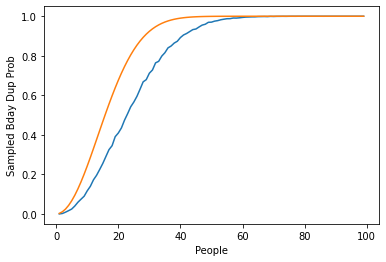

In [6]:
import matplotlib.pyplot as plt
plt.plot([p[0] for p in probs], [p[1] for p in probs],[p[0] for p in calc_probs], [p[1] for p in calc_probs])
plt.xlabel("People")
plt.ylabel('Bday Dup Prob')